In [ ]:
import numpy as np
import pandas as pd

# 1. Helper function to calculate entropy
def entropy(dataset):
    # Count the occurrences of each class label in the dataset
    class_counts = dataset.iloc[:, -1].value_counts()
    # Calculate the entropy of the dataset using the formula
    prob = class_counts / len(dataset)
    return -np.sum(prob * np.log2(prob))

# 2. Function to calculate information gain
def information_gain(dataset, feature):
    # Calculate the entropy of the original dataset
    total_entropy = entropy(dataset)

    # Get the values of the feature and their frequencies
    feature_values = dataset[feature].value_counts()
    weighted_entropy = 0

    # For each feature value, calculate the weighted entropy of the split
    for value, count in feature_values.items():
        subset = dataset[dataset[feature] == value]
        weighted_entropy += (count / len(dataset)) * entropy(subset)

    # Return the information gain as the difference between the total entropy and the weighted entropy
    return total_entropy - weighted_entropy

# 3. Function to get the best feature to split on
def best_feature(dataset):
    features = dataset.columns[:-1]  # All columns except the target column
    best_info_gain = -1
    best_feature = None

    # Calculate the information gain for each feature
    for feature in features:
        info_gain = information_gain(dataset, feature)
        if info_gain > best_info_gain:
            best_info_gain = info_gain
            best_feature = feature

    return best_feature

# 4. Recursive function to build the decision tree (ID3 with simple pruning)
def id3(dataset, max_depth=None, depth=0):
    # Check for base cases
    if len(dataset.iloc[:, -1].unique()) == 1:  # All examples have the same label
        return dataset.iloc[0, -1]
    if len(dataset.columns) == 1:  # No more features to split on
        return dataset.iloc[:, -1].mode()[0]
    if max_depth is not None and depth >= max_depth:  # Reached max depth
        return dataset.iloc[:, -1].mode()[0]  # Return the most frequent class

    # Choose the best feature to split on
    best = best_feature(dataset)

    # Create the tree as a dictionary
    tree = {best: {}}

    # Split the dataset based on the best feature and build subtrees
    for value in dataset[best].unique():
        subset = dataset[dataset[best] == value]
        tree[best][value] = id3(subset.drop(columns=[best]), max_depth=max_depth, depth=depth+1)

    return tree

# 5. Example of pruning function (simple) - removes nodes that do not help improve accuracy
def prune_tree(tree, test_data):
    if isinstance(tree, dict):
        for key, value in tree.items():
            for sub_key, sub_value in value.items():
                # Recursively prune the subtree
                tree[key][sub_key] = prune_tree(sub_value, test_data)

    # Here you would normally validate the tree and prune it based on test data
    # For simplicity, let's just return the tree unchanged for now
    return tree

# 6. Example Dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot'],
    'Humidity': ['High', 'High', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'High', 'Low'],
    'Windy': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Weak', 'Weak', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No']  # Target variable
}

# 7. Create the dataset
df = pd.DataFrame(data)

# 8. Build the decision tree using ID3
tree = id3(df, max_depth=3)
print("Decision Tree:", tree)

# 9. Prune the decision tree (simple pruning, for now just returns the tree unchanged)
pruned_tree = prune_tree(tree, df)
print("Pruned Decision Tree:", pruned_tree)


Decision Tree: {'Outlook': {'Sunny': {'Temperature': {'Hot': 'No', 'Mild': {'Windy': {'Weak': 'No', 'Strong': 'Yes'}}}}, 'Overcast': 'Yes', 'Rainy': 'Yes'}}
Pruned Decision Tree: {'Outlook': {'Sunny': {'Temperature': {'Hot': 'No', 'Mild': {'Windy': {'Weak': 'No', 'Strong': 'Yes'}}}}, 'Overcast': 'Yes', 'Rainy': 'Yes'}}


In [ ]:
import numpy as np
import pandas as pd

# 1. Helper function to calculate entropy
def entropy(dataset):
    # Count the occurrences of each class label in the dataset
    class_counts = dataset.iloc[:, -1].value_counts()
    # Calculate the entropy of the dataset using the formula
    prob = class_counts / len(dataset)
    return -np.sum(prob * np.log2(prob))

# 2. Function to calculate information gain
def information_gain(dataset, feature):
    # Calculate the entropy of the original dataset
    total_entropy = entropy(dataset)

    # Get the values of the feature and their frequencies
    feature_values = dataset[feature].value_counts()
    weighted_entropy = 0

    # For each feature value, calculate the weighted entropy of the split
    for value, count in feature_values.items():
        subset = dataset[dataset[feature] == value]
        weighted_entropy += (count / len(dataset)) * entropy(subset)

    # Return the information gain as the difference between the total entropy and the weighted entropy
    return total_entropy - weighted_entropy

# 3. Function to get the best feature to split on
def best_feature(dataset):
    features = dataset.columns[:-1]  # All columns except the target column
    best_info_gain = -1
    best_feature = None

    # Calculate the information gain for each feature
    for feature in features:
        info_gain = information_gain(dataset, feature)
        if info_gain > best_info_gain:
            best_info_gain = info_gain
            best_feature = feature

    return best_feature

# 4. Recursive function to build the decision tree (ID3 with simple pruning)
def id3(dataset, max_depth=None, depth=0):
    # Check for base cases
    if len(dataset.iloc[:, -1].unique()) == 1:  # All examples have the same label
        return dataset.iloc[0, -1]
    if len(dataset.columns) == 1:  # No more features to split on
        return dataset.iloc[:, -1].mode()[0]
    if max_depth is not None and depth >= max_depth:  # Reached max depth
        return dataset.iloc[:, -1].mode()[0]  # Return the most frequent class

    # Choose the best feature to split on
    best = best_feature(dataset)

    # Create the tree as a dictionary
    tree = {best: {}}

    # Split the dataset based on the best feature and build subtrees
    for value in dataset[best].unique():
        subset = dataset[dataset[best] == value]
        tree[best][value] = id3(subset.drop(columns=[best]), max_depth=max_depth, depth=depth+1)

    return tree

# 5. Function to print the decision tree in a tree-like format
def print_tree(tree, depth=0):
    # If the tree is a dictionary, it means it's a decision node
    if isinstance(tree, dict):
        for key, value in tree.items():
            print("  " * depth + str(key))  # Print the feature (node)
            for sub_key, sub_value in value.items():
                print("  " * (depth + 1) + str(sub_key) + ":")
                print_tree(sub_value, depth + 2)  # Recur for the next level
    else:
        print("  " * depth + "-> " + str(tree))  # If it's a leaf, print the class label

# 6. Example Dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot'],
    'Humidity': ['High', 'High', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'High', 'Low'],
    'Windy': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Weak', 'Weak', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No']  # Target variable
}

# 7. Create the dataset
df = pd.DataFrame(data)

# 8. Build the decision tree using ID3
tree = id3(df, max_depth=3)
print("Decision Tree Structure:")
print_tree(tree)


Decision Tree Structure:
Outlook
  Sunny:
    Temperature
      Hot:
        -> No
      Mild:
        Windy
          Weak:
            -> No
          Strong:
            -> Yes
  Overcast:
    -> Yes
  Rainy:
    -> Yes


In [ ]:
import numpy as np
import pandas as pd
from graphviz import Digraph

# 1. Helper function to calculate entropy
def entropy(dataset):
    class_counts = dataset.iloc[:, -1].value_counts()
    prob = class_counts / len(dataset)
    return -np.sum(prob * np.log2(prob))

# 2. Function to calculate information gain
def information_gain(dataset, feature):
    total_entropy = entropy(dataset)
    feature_values = dataset[feature].value_counts()
    weighted_entropy = 0
    for value, count in feature_values.items():
        subset = dataset[dataset[feature] == value]
        weighted_entropy += (count / len(dataset)) * entropy(subset)
    return total_entropy - weighted_entropy

# 3. Function to get the best feature to split on
def best_feature(dataset):
    features = dataset.columns[:-1]
    best_info_gain = -1
    best_feature = None
    for feature in features:
        info_gain = information_gain(dataset, feature)
        if info_gain > best_info_gain:
            best_info_gain = info_gain
            best_feature = feature
    return best_feature

# 4. Recursive function to build the decision tree (ID3 with simple pruning)
def id3(dataset, max_depth=None, depth=0):
    if len(dataset.iloc[:, -1].unique()) == 1:
        return dataset.iloc[0, -1]
    if len(dataset.columns) == 1:
        return dataset.iloc[:, -1].mode()[0]
    if max_depth is not None and depth >= max_depth:
        return dataset.iloc[:, -1].mode()[0]
    best = best_feature(dataset)
    tree = {best: {}}
    for value in dataset[best].unique():
        subset = dataset[dataset[best] == value]
        tree[best][value] = id3(subset.drop(columns=[best]), max_depth=max_depth, depth=depth+1)
    return tree

# 5. Function to create a graphical decision tree
def create_tree_diagram(tree, dot=None, parent_name="Root", parent_value=""):
    if dot is None:
        dot = Digraph(format="png", engine="dot")

    # Recursively add nodes to the graph
    if isinstance(tree, dict):
        for feature, branches in tree.items():
            feature_name = f"{parent_name}_{feature}"
            dot.node(feature_name, feature)
            dot.edge(parent_name, feature_name, label=parent_value)

            for value, subtree in branches.items():
                value_name = f"{feature_name}_{value}"
                dot.node(value_name, f"{feature}: {value}")
                dot.edge(feature_name, value_name, label=str(value))

                # Recurse for each subtree
                create_tree_diagram(subtree, dot, value_name, str(value))
    else:
        dot.node(parent_name + "_class", f"Class: {tree}")
        dot.edge(parent_name, parent_name + "_class", label="Leaf")

    return dot

# 6. Example Dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool','Mild', 'Cool','Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# 7. Create the dataset
df = pd.DataFrame(data)

# 8. Build the decision tree using ID3
tree = id3(df, max_depth=3)

# 9. Create the decision tree diagram
dot = create_tree_diagram(tree)

# 10. Render and display the tree diagram
dot.render("decision_tree", view=True)  # This will generate a PNG file and open it in the default viewer


'decision_tree.png'

END TO END

In [ ]:
import pandas as pd

housing = pd.read_csv("housing.csv")

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing["ocean_proximity"].value_counts()
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


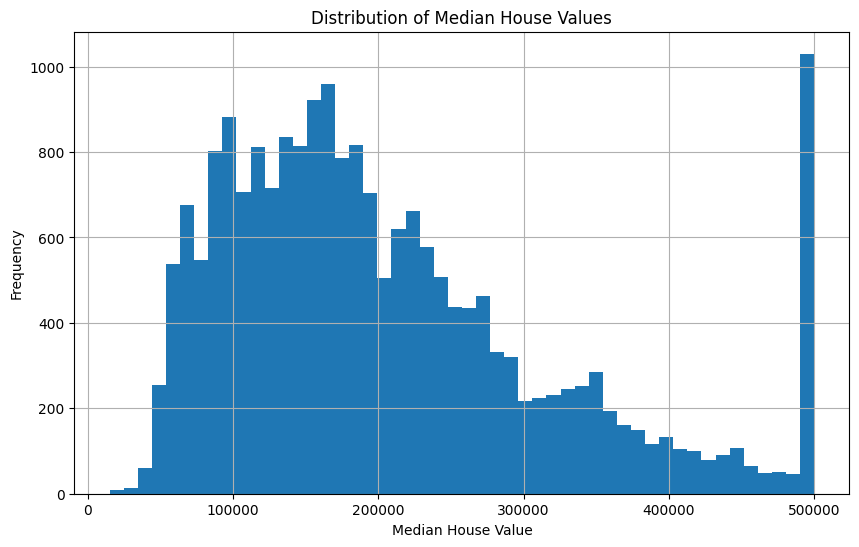

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the housing data
housing = pd.read_csv("housing.csv")

# Check for the 'median_house_value' column in the DataFrame
if 'median_house_value' in housing.columns:
    # If the column exists, plot the histogram
    housing['median_house_value'].hist(bins=50, figsize=(10, 6))
    plt.xlabel("Median House Value")
    plt.ylabel("Frequency")
    plt.title("Distribution of Median House Values")
    plt.show()
else:
    # If the column is not found, print an informative message
    print("Error: 'median_house_value' column not found in the DataFrame. Please check your data file.")

In [ ]:
import numpy as np

# Example dataset

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13,
14], [15, 16], [17, 18], [19, 20]])

y = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split

# Split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Load the dataset

url ="/content/housing.csv"

housing = pd.read_csv(url)

# Separate into features (X) and target (y)

X = housing.drop("median_house_value", axis=1) # Features (all columns except the target)

y = housing["median_house_value"] # Target variable

# Split into train and test sets with stratification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [ ]:

import pandas as pd

from sklearn.model_selection import train_test_split

# Load the dataset

url ="/content/housing.csv"

housing = pd.read_csv(url)

# Separate into features (X) and target (y)

X = housing.drop("median_house_value", axis=1) # Features (all columns except the target)

y = housing["median_house_value"] # Target variable

# Create categories for the target variable

housing["income_cat"] = pd.cut(housing["median_house_value"],

bins=[0, 100000, 200000, 300000, 400000, np.inf],

labels=[1, 2, 3, 4, 5])

# Split into train and test sets with stratification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
stratify=housing["income_cat"])

<ipython-input-21-7963ce37555c>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


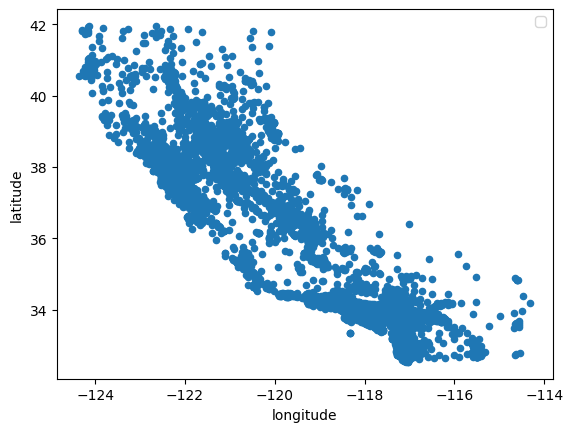

In [ ]:
import matplotlib.pyplot as plt

# Add the target variable back to the training set for
#visualization

train_set = X_train.copy()

train_set["median_house_value"] = y_train

# Plot the training set

train_set.plot(kind="scatter", x="longitude", y="latitude")

plt.legend()

<ipython-input-22-0be964dcd945>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


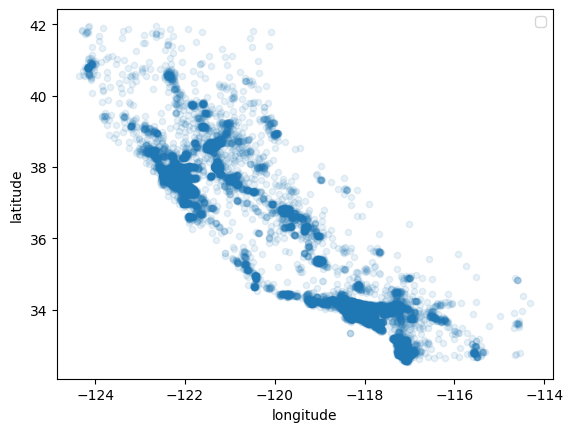

In [ ]:
import matplotlib.pyplot as plt

# Add the target variable back to the training set for visualization

train_set = X_train.copy()

train_set["median_house_value"] = y_train

# Plot the training set

train_set.plot(kind="scatter", x="longitude",
y="latitude",alpha=0.1)

plt.legend()

<Axes: xlabel='longitude', ylabel='latitude'>

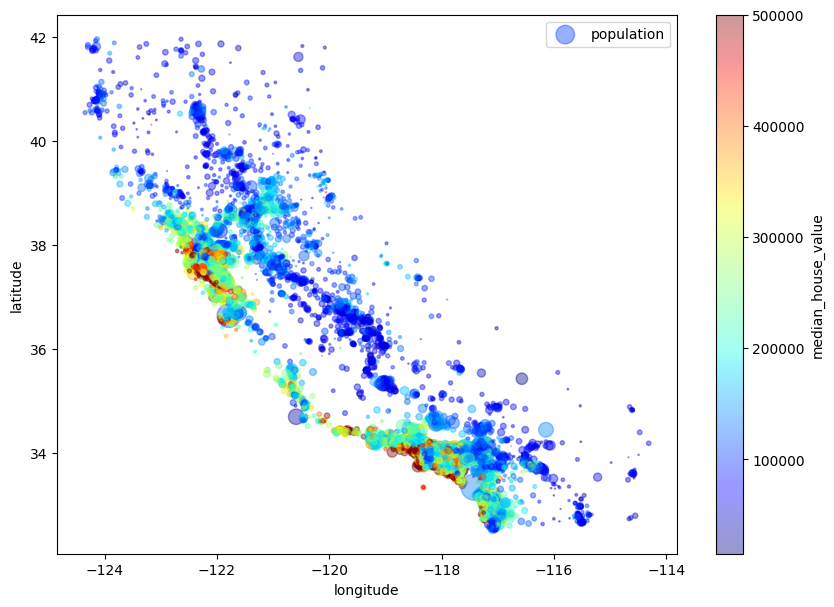

In [ ]:
train_set.plot(kind="scatter", x="longitude", y="latitude",
alpha=0.4, s=train_set["population"]/100, label="population",
figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"),
colorbar=True)

In [ ]:
housing = pd.read_csv(url)

# Select only numerical columns (excluding categorical columnslike 'ocean_proximity')

numerical_columns = housing.select_dtypes(include=['float64',
'int64'])

# Calculate the correlation matrix

correlation_matrix = numerical_columns.corr()

# Display the correlation of 'median_house_value' with other= numerical columns

print(correlation_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


<Axes: xlabel='median_income', ylabel='median_house_value'>

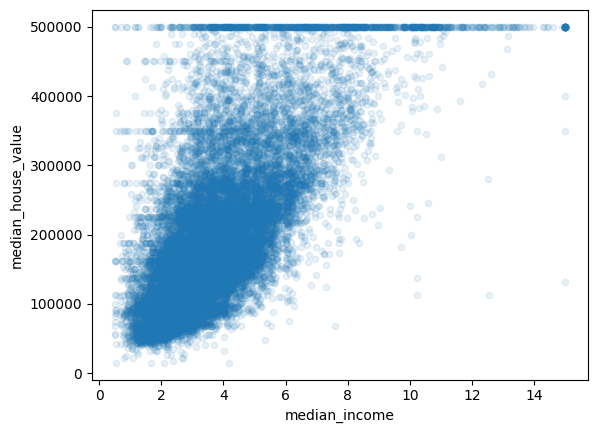

In [ ]:
housing.plot(kind="scatter", x="median_income",
y="median_house_value", alpha=0.1)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = housing.drop("median_house_value", axis=1)  # Features (all columns except the target)
y = housing["median_house_value"]  # Target variable

# Split into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)